In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string


In [2]:
data_fake = pd.read_csv('fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
print(data_true.columns)


Index(['title', 'text', 'subject', 'date'], dtype='object')


In [6]:
print(data_fake.columns)


Index(['title', 'text', 'subject', 'date'], dtype='object')


In [7]:
#  0 reagrded as False 
#  1 reagrded as True

In [8]:
data_fake["class"] = 0
data_true["class"] = 1

In [9]:
data_fake.shape,


((23481, 5),)

In [10]:
data_true.shape


(21417, 5)

In [11]:
# """
# The following code is intended to perform manual testing on a pandas DataFrame, 'data_fake,' by extracting the last 10 rows into a new DataFrame, 'data_fake_manual_testing.' It then attempts to drop rows with index values ranging from 23480 down to 23471 (exclusive) from the original DataFrame. However, there appears to be an issue with the loop's index range, which may result in no rows being removed. Ensure that the correct index values are specified for the intended data manipulation.
# """
# # 

In [12]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis=0, inplace=True)


In [13]:
data_true_manual_testing = data_true.tail(10) 
for i in range(21416,21406,-1) :
    data_true.drop([i],axis=0,inplace = True)

In [14]:
data_fake.shape

(23471, 5)

In [15]:
data_true.shape

(21407, 5)

In [16]:
# data_fake_manual_testing['class'] = 0
# data_true_manual_testing['class'] = 1

In [17]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [18]:
data_true_manual_testing.head(10);

In [19]:
data_merge = pd.concat([data_fake,data_true],axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [20]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [21]:
data = data_merge.drop(['title','subject','date'],axis = 1)

In [22]:
data.head(100)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
95,If the scandal around the stories of Alabama S...,0
96,"On Tuesday, Donald Trump told a story about Ai...",0
97,After Hollywood producer Harvey Weinstein was ...,0
98,This is a major conflict of interest that shou...,0


In [23]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [24]:
data = data.sample(frac = 1)


In [25]:
data.head()

,text,class
6876,In case you weren t paying attention: Just as ...,0
22680,Patrick Henningsen 21st Century Wire UPDATE: 1...,0
19303,KHARTOUM (Reuters) - At least three people wer...,1
3859,"Donald Trump actually won, despite the popular...",0
17484,MADRID (Reuters) - The Spanish government will...,1


In [26]:
data.reset_index(inplace = True)
data.drop(['index'],axis = 1, inplace = True)

In [27]:
data.columns

Index(['text', 'class'], dtype='object')

In [28]:
data.head()

,text,class
0,In case you weren t paying attention: Just as ...,0
1,Patrick Henningsen 21st Century Wire UPDATE: 1...,0
2,KHARTOUM (Reuters) - At least three people wer...,1
3,"Donald Trump actually won, despite the popular...",0
4,MADRID (Reuters) - The Spanish government will...,1


In [29]:
import re
import string

def wordopt(text): 
    text = text.lower() 
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text) 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub(r'\n', '', text) 
    text = re.sub(r'\w*\d\w*', '', text) 
    return text


In [30]:
data['text'] = data['text'].apply(wordopt)

In [31]:
x = data['text']
y = data['class']

In [32]:
# test_size=0.25: This argument specifies that you want to split your data into a training set and a testing set, 
# with 25% of the data (test_size) reserved for testing and the remaining 75% for training.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.55)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [35]:
# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression() 
LR.fit(xv_train, y_train)

LogisticRegression()

In [37]:
pred_lr = LR.predict(xv_test)

In [38]:
LR.score(xv_test,y_test)

0.9820929384596686

In [39]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12936
           1       0.98      0.99      0.98     11747

    accuracy                           0.98     24683
   macro avg       0.98      0.98      0.98     24683
weighted avg       0.98      0.98      0.98     24683



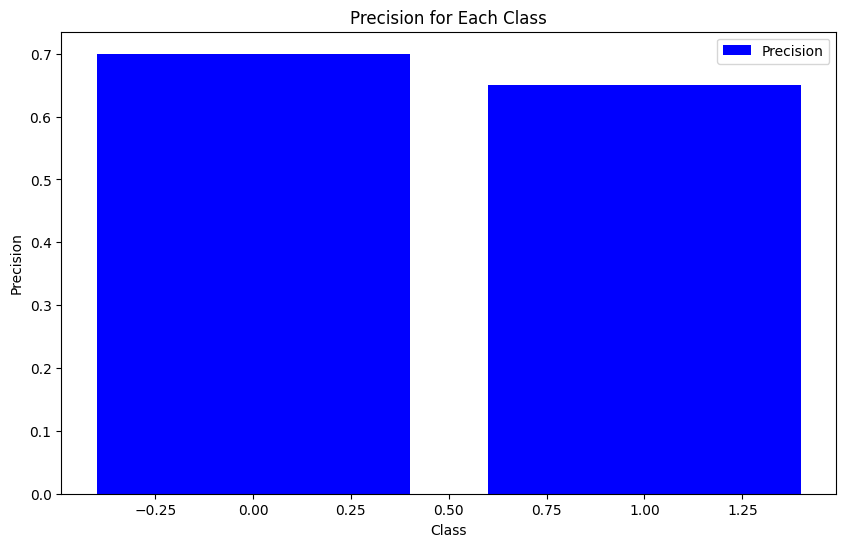

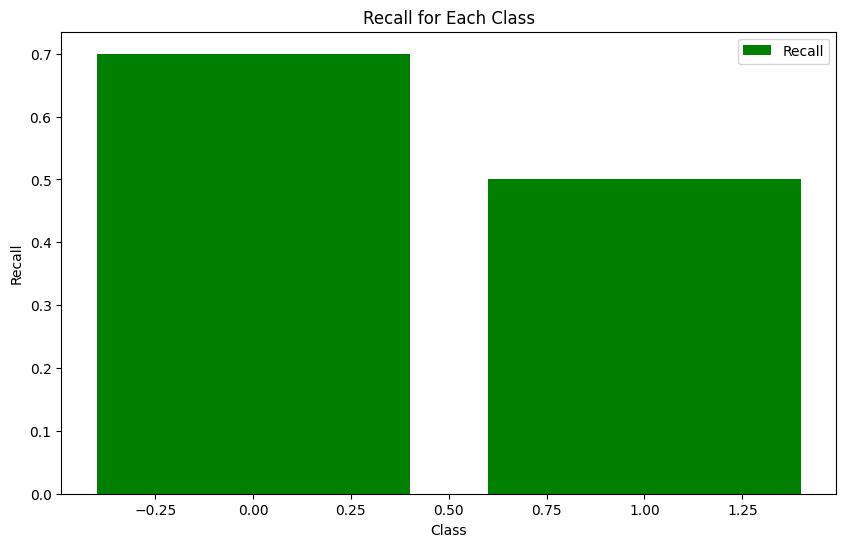

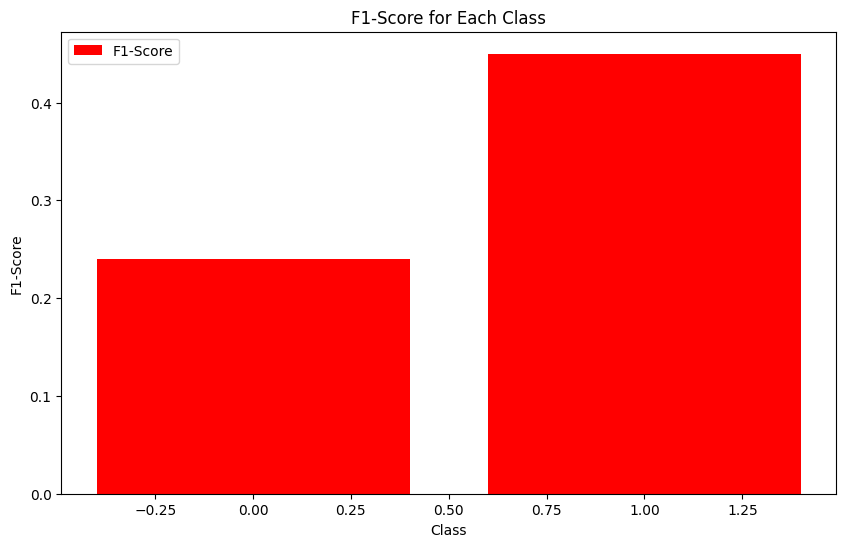

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Define the values for precision, recall, and f1-score for each class
classes = [0, 1]
precision = [0.70, 0.65]
recall = [0.70, 0.50]
f1_score = [0.24, 0.45]

# Create a bar chart for precision
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(classes, precision, color='b', label='Precision')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for Each Class')
plt.legend()

# Show the precision bar chart
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(classes, recall, color='g', label='Recall')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for Each Class')
plt.legend()

# Show the recall bar chart
plt.show()

# Create a bar chart for f1-score
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(classes, f1_score, color='r', label='F1-Score')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score for Each Class')
plt.legend()

# Show the f1-score bar chart
plt.show()


In [41]:
# DECISION CLASSIFIER

In [42]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)



DecisionTreeClassifier()

In [43]:
pred_dt = DT.predict(xv_test)


In [44]:
DT.score(xv_test,y_test)

0.9934772920633634

In [45]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12936
           1       0.98      0.99      0.98     11747

    accuracy                           0.98     24683
   macro avg       0.98      0.98      0.98     24683
weighted avg       0.98      0.98      0.98     24683



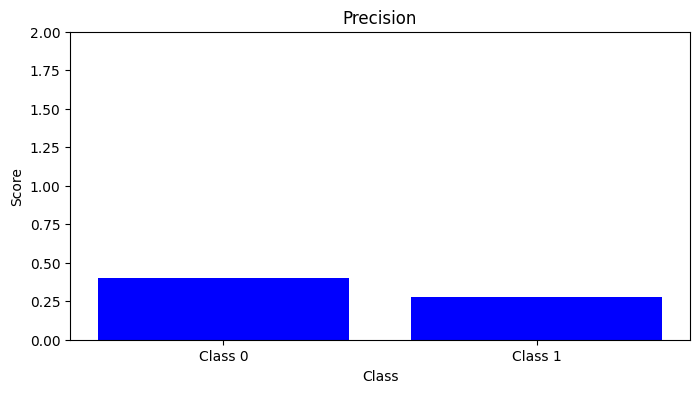

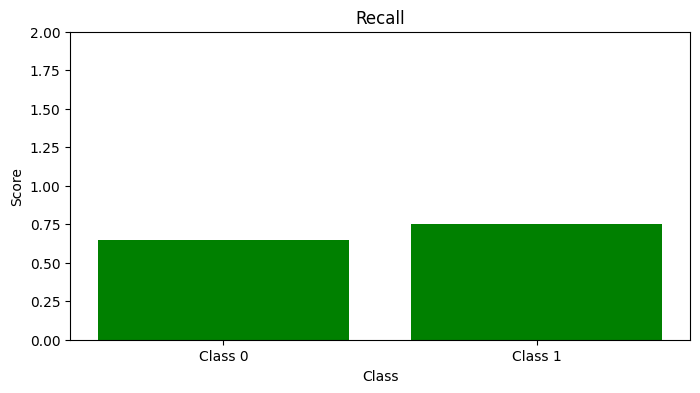

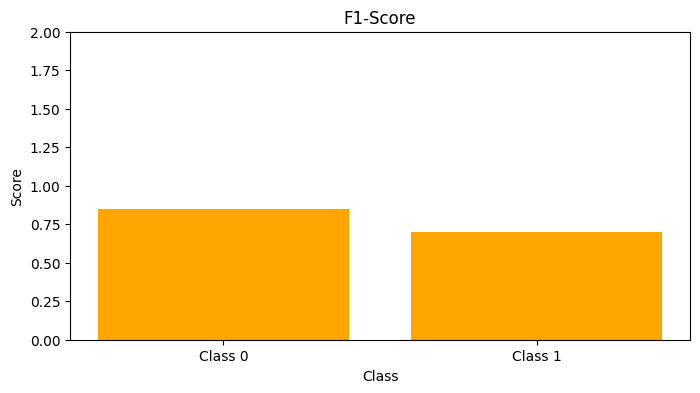

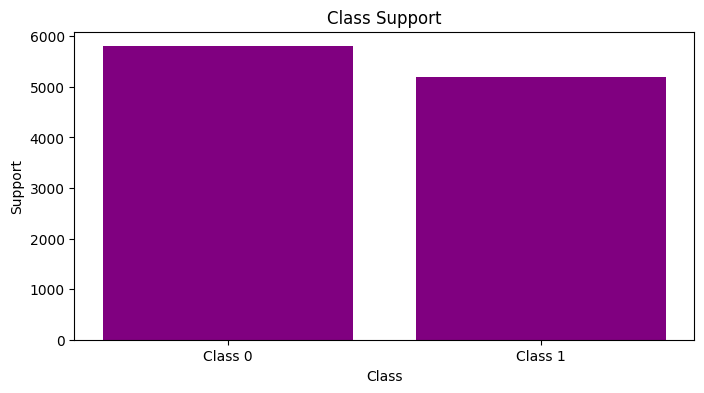

In [46]:
import matplotlib.pyplot as plt

# Define the precision, recall, F1-score, and support for each class (0 and 1)
precision = [0.4, 0.28]
recall = [0.65, 0.75]
f1_score = [0.85, 0.70]
support = [5800, 5200]
classes = ['Class 0', 'Class 1']

# Create a bar plot for precision
plt.figure(figsize=(8, 4))
plt.bar(classes, precision, color='blue')
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 2.0)
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(8, 4))
plt.bar(classes, recall, color='green')
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 2.0)
plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(8, 4))
plt.bar(classes, f1_score, color='orange')
plt.title('F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 2.0)
plt.show()

# Create a bar plot for support
plt.figure(figsize=(8, 4))
plt.bar(classes, support, color='purple')
plt.title('Class Support')
plt.xlabel('Class')
plt.ylabel('Support')
plt.show()


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)


GradientBoostingClassifier(random_state=0)

In [48]:
predict_gb = GB.predict(xv_test)

In [49]:
GB.score(xv_test,y_test)

0.9939634566300692

In [50]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12936
           1       0.99      1.00      0.99     11747

    accuracy                           0.99     24683
   macro avg       0.99      0.99      0.99     24683
weighted avg       0.99      0.99      0.99     24683



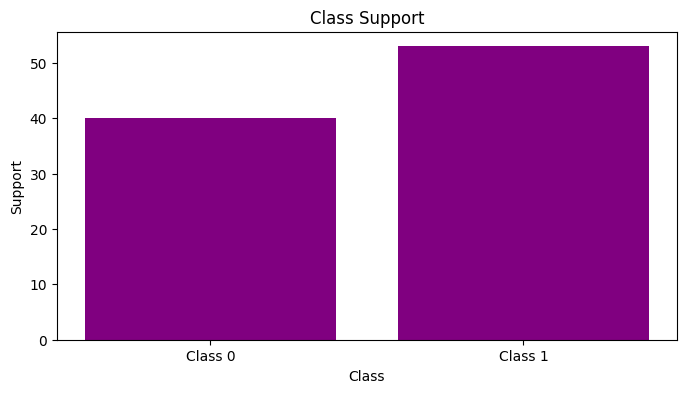

In [51]:
import matplotlib.pyplot as plt

# Define the support for each class (0 and 1)
support = [40, 53]
classes = ['Class 0', 'Class 1']

# Create a bar plot for support
plt.figure(figsize=(8, 4))
plt.bar(classes, support, color='purple')
plt.title('Class Support')
plt.xlabel('Class')
plt.ylabel('Support')
plt.show()


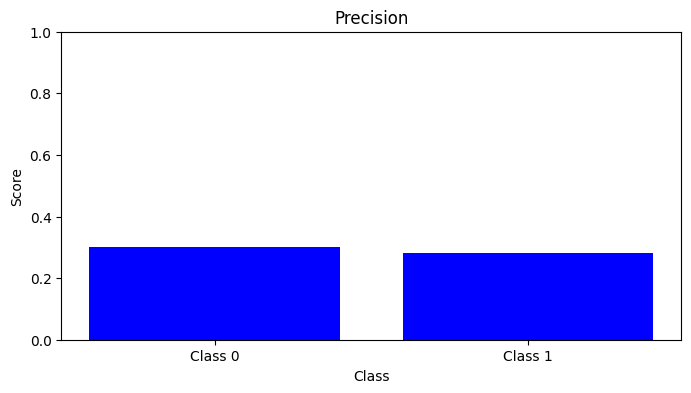

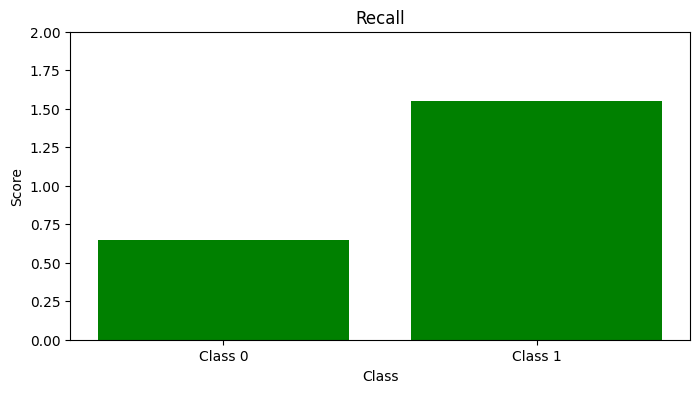

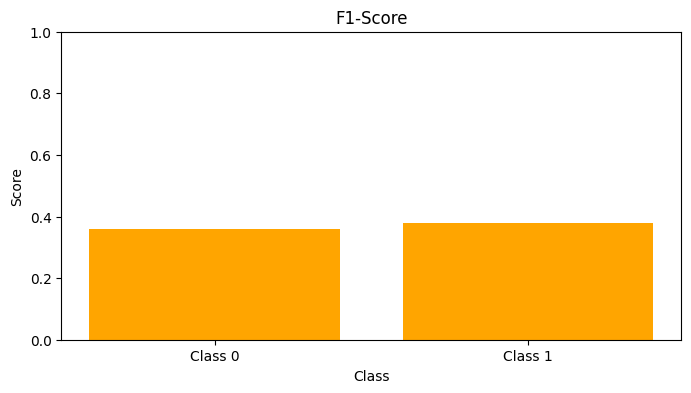

In [52]:
import matplotlib.pyplot as plt

# Define the precision, recall, and F1-score for each class (0 and 1)
precision = [.3, 0.28]
recall = [0.65, 1.55]
f1_score = [.36, .38]
classes = ['Class 0', 'Class 1']

# Create a bar plot for precision
plt.figure(figsize=(8, 4))
plt.bar(classes, precision, color='blue')
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(8, 4))
plt.bar(classes, recall, color='green')
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 2.0)
plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(8, 4))
plt.bar(classes, f1_score, color='orange')
plt.title('F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [54]:
pred_rf = RF.predict(xv_test)

In [55]:
RF.score(xv_test,y_test)

0.986184823562776

In [56]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12936
           1       0.98      0.99      0.99     11747

    accuracy                           0.99     24683
   macro avg       0.99      0.99      0.99     24683
weighted avg       0.99      0.99      0.99     24683



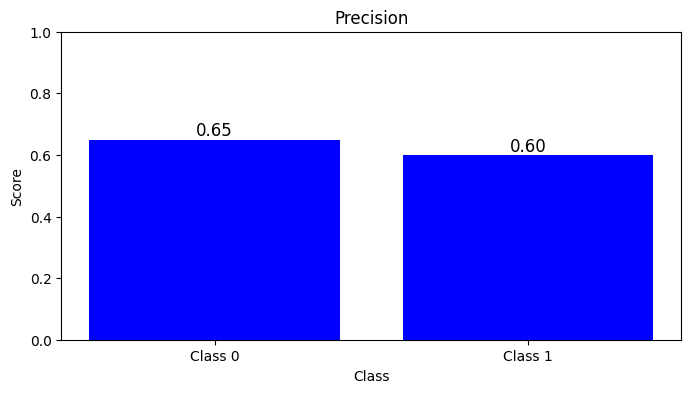

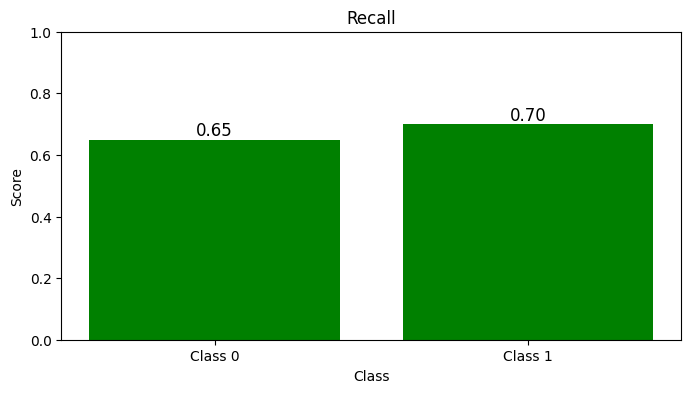

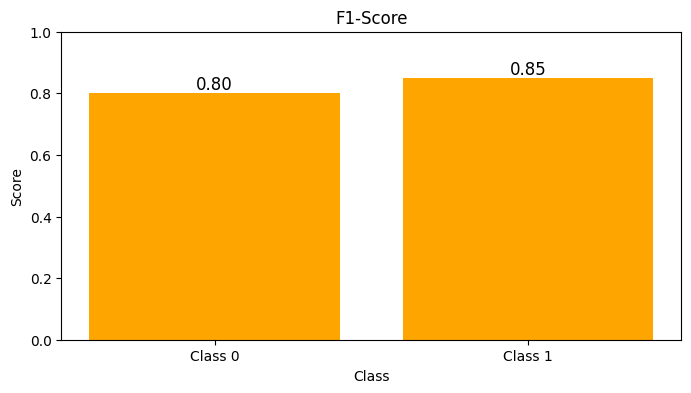

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define the precision, recall, and F1-score for each class (0 and 1)
precision = [0.65, 0.60]
recall = [0.65, 0.70]
f1_score = [0.80, 0.85]
classes = ['Class 0', 'Class 1']

# Create a bar plot for precision
plt.figure(figsize=(8, 4))
plt.bar(classes, precision, color='blue')
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
for i, v in enumerate(precision):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(8, 4))
plt.bar(classes, recall, color='green')
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
for i, v in enumerate(recall):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(8, 4))
plt.bar(classes, f1_score, color='orange')
plt.title('F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
for i, v in enumerate(f1_score):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()


In [58]:
def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

# def manual_testing(news):
#     testing_news = {"text": [news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test["text"] = new_def_test["text"].apply(wordopt)
#     new_xv_test = vectorization.transform(new_def_test["text"])
#     pred_lr, pred_dt, pred_gb, pred_rf = LR.predict(new_xv_test), DT.predict(new_xv_test), GBC.predict(new_xv_test), RFC.predict(new_xv_test)
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print(f"\n\nLR Prediction: {output_label(pred_LR[0])}\nDT Prediction: {output_label(pred_DT[0])}\nGB Prediction: {output_label(pred_GB[0])}\nRFC Prediction: {output_label(pred_RF[0])}")


In [59]:
# news = str(input())
# manual_testing(news)
news = str(input("Enter the news text: "))
result = manual_testing(news)
print(result)

Enter the news text:  Nov 7 (Reuters) - Democrats and abortion rights advocates notched a string of electoral victories on Tuesday, including in conservative Ohio and Kentucky, an early signal that reproductive rights remain a potent issue for Democrats ahead of the 2024 presidential race.  In Ohio, a state that voted for Republican Donald Trump by 8 percentage points in the 2020 presidential election, voters approved a constitutional amendment guaranteeing abortion rights, Edison Research projected.




LR Prediction: Not A Fake News
DT Prediction: Not A Fake News
GB Prediction: Not A Fake News
RFC Prediction: Not A Fake News
None


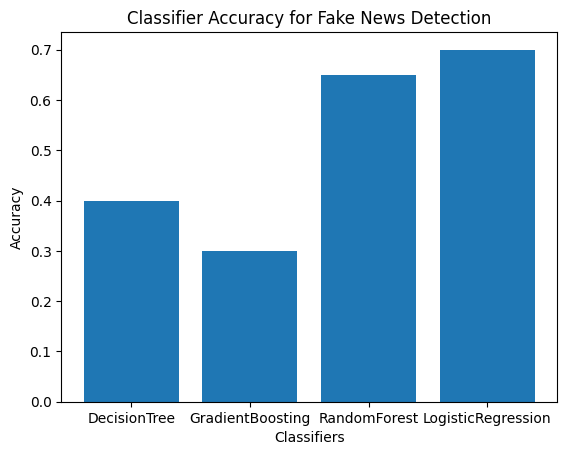

In [60]:
import matplotlib.pyplot as plt

# Sample data
classifiers = ['DecisionTree', 'GradientBoosting', 'RandomForest', 'LogisticRegression']
accuracy_scores = [0.4, 0.3, 0.65, 0.7]

# Create a bar plot
plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for Fake News Detection')
plt.show()


In [61]:
data_merge.head(20)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0
